In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
@jit(nopython=True)
def RK4_ZZ(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    Etheta = np.exp(1j*y0)
    Na = args[0]
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    Z1as = np.zeros(n,dtype=np.complex64)
    Z1bs = np.zeros(n,dtype=np.complex64)
    Z2as = np.zeros(n,dtype=np.complex64)
    Z2bs = np.zeros(n,dtype=np.complex64)

    Z1as[0] = Z1a
    Z2as[0] = Z2a
    Z1bs[0] = Z1b
    Z2bs[0] = Z2b
    
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1,Z1a,Z1b,Z2a,Z2b = f(y[i], t[i], *args)
        k2,_,_,_,_ = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_,_,_,_ = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_,_,_,_ = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        Z1as[i+1],Z1bs[i+1],Z2as[i+1],Z2bs[i+1] = Z1a,Z1b,Z2a,Z2b
    return y,(Z1as,Z1bs,Z2as,Z2bs)

@jit(nopython=True)
def RK4_ZZ2(f, y0, t, args=()):
    n = len(t)
    Etheta = np.exp(1j*y0)
    Na = args[0]
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    Z1as = np.zeros(n,dtype=np.complex64)
    Z1bs = np.zeros(n,dtype=np.complex64)
    Z2as = np.zeros(n,dtype=np.complex64)
    Z2bs = np.zeros(n,dtype=np.complex64)

    Z1as[0] = Z1a
    Z2as[0] = Z2a
    Z1bs[0] = Z1b
    Z2bs[0] = Z2b
    
    y = y0
    
    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1,Z1a,Z1b,Z2a,Z2b = f(y, t[i], *args)
        k2,_,_,_,_ = f(y + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3,_,_,_,_ = f(y + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4,_,_,_,_ = f(y + k3 * h, t[i] + h, *args)
        y = y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
        Z1as[i+1],Z1bs[i+1],Z2as[i+1],Z2bs[i+1] = Z1a,Z1b,Z2a,Z2b
    return Z1as,Z1bs,Z2as,Z2bs

@jit(nopython=True)
def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2

# @jit(nopython=True)
# def Kuramoto_MF_CHIMERA(Theta,t,Na,Nb,beta,alpha,K):
#     dtheta = np.zeros(Na+Nb)

#     Etheta = np.exp(1j*Theta)
#     EA,EB = Etheta[:Na],Etheta[Na:]
#     Z1a,Z2a = get_ZE12(EA)
#     Z1b,Z2b = get_ZE12(EB)
#     A = np.exp(-1j*alpha)
#     EA,EB = np.conjugate(EA), np.conjugate(EB)
#     ZZa =  (Z1a+beta*Z1b)
#     ZZb =  (Z1b+beta*Z1a)
#     dtheta[:Na] = K*((A*(ZZa**2-Z2a/Na - beta*Z2b/Nb))*EA*EA -(2*A/Na*ZZa)*EA).imag
#     dtheta[Na:] = K*((A*(ZZb**2-Z2b/Nb - beta*Z2a/Na))*EB*EB -(2*A/Nb*ZZb)*EB).imag
#     return dtheta,Z1a,Z1b,Z2a,Z2b

@jit(nopython=True)
def Kuramoto_MF_CHIMERA(Theta,t,Na,Nb,beta,alpha,K):
    dtheta = np.zeros(Na+Nb)

    Etheta = np.exp(1j*Theta)
    EA,EB = Etheta[:Na],Etheta[Na:]
    Z1a,Z2a = get_ZE12(EA)
    Z1b,Z2b = get_ZE12(EB)
    A = np.exp(-1j*alpha)
    EA,EB = np.conjugate(EA), np.conjugate(EB)
    ZZa =  K*(Z1a+beta*Z1b)
    ZZb =  K*(Z1b+beta*Z1a)
    dtheta[:Na] = ((A*(ZZa**2))*EA*EA).imag
    dtheta[Na:] = ((A*(ZZb**2))*EB*EB).imag
    return dtheta,Z1a,Z1b,Z2a,Z2b

## make distribution

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
from scipy.special import erfinv

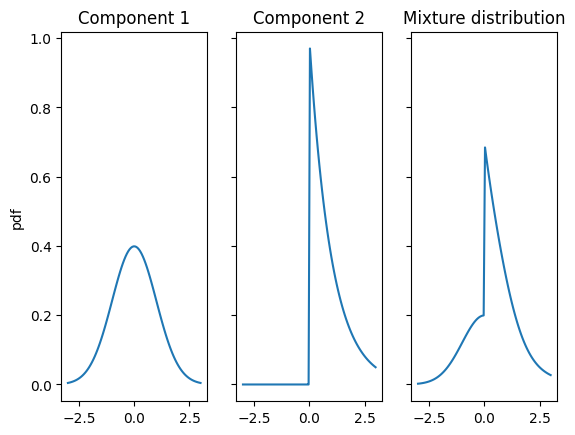

In [ ]:
xs = np.linspace(-3, 3, 100)
ps_component1 = stats.norm().pdf(xs)
ps_component2 = stats.expon().pdf(xs)
ps_mixture = 0.5 * ps_component1 + 0.5 * ps_component2

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.plot(xs, ps_component1)
ax1.set_title('Component 1')
ax2.plot(xs, ps_component2)
ax2.set_title('Component 2')
ax3.plot(xs, ps_mixture)
ax3.set_title('Mixture distribution')
ax1.set_ylabel('pdf');


In [15]:
import functools
import numpy as np
from scipy.optimize import root_scalar


def _vectorize_float(f):
    vectorized = np.vectorize(f, otypes=[float], signature="(),()->()")

    @functools.wraps(f)
    def wrapper(*args):
        return vectorized(*args)

    return wrapper


class MixtureDistribution:
    def __init__(self, distributions, weights):
        self._distributions = list(distributions)
        self._weights = list(weights)

        if not (all(w >= 0 for w in self._weights) and sum(self._weights) == 1):
            raise ValueError("Invalid weight vector.")

        if len(self._distributions) != len(self._weights):
            raise ValueError("Mixtures and weights must have the same length.")

        if len(self._distributions) < 2:
            raise ValueError("Must have at least two component distributions.")

    @_vectorize_float
    def pdf(self, x):
        return sum(w * d.pdf(x) for w, d in zip(self._weights, self._distributions))

    @_vectorize_float
    def cdf(self, x):
        return sum(w * d.cdf(x) for w, d in zip(self._weights, self._distributions))

    @_vectorize_float
    def ppf(self, p):
        bracket = [min(dist.ppf(p) for dist in self._distributions),
                   max(dist.ppf(p) for dist in self._distributions)]

        r = root_scalar(
            f=lambda x: self.cdf(x) - p,
            fprime=self.pdf,
            bracket=bracket,
            x0=0
        )
        assert r.converged
        return r.root
    # https://www.jamesatkins.com/posts/quantile-function-of-mixture-distributions-in-python/

In [160]:
eta1 = 0.1
eta2 = 0.5
sigma1 = 1e-10
sigma2 = 0.4
shift = 0*np.pi/4
m1 = MixtureDistribution([stats.norm(0,sigma1), stats.norm(np.pi,sigma1)], [1/2 + eta1/2, 1/2 - eta1/2])
m2 = MixtureDistribution([stats.norm(0+shift,sigma2), stats.norm(np.pi+shift,sigma2)], [1/2 + eta2/2, 1/2 - eta2/2])

In [161]:
N = 500
ps = (np.arange(N+1)[:-1] + 1)/(N+1)
theta1 = m1.ppf(ps)
theta2 = m2.ppf(ps)
Theta = np.r_[theta1,theta2]

Q2_init = np.mean(np.exp(2j*theta2))
print(abs(Q2_init),np.angle(Q2_init))

0.729325209724348 -0.0009767291728866299


(array([275.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        225.]),
 array([-2.68352071e-10,  3.14159263e-02,  6.28318528e-02,  9.42477794e-02,
         1.25663706e-01,  1.57079632e-01,  1.88495559e-01,  2.19911486e-01,
         2.51327412e-01,  2.82743339e-01,  3.14159265e-01,  3.45575192e-01,
         3.76991118e-01,  4.08407045e-01,  4.39822971e-01,  4.71238898e-01,
         5.026

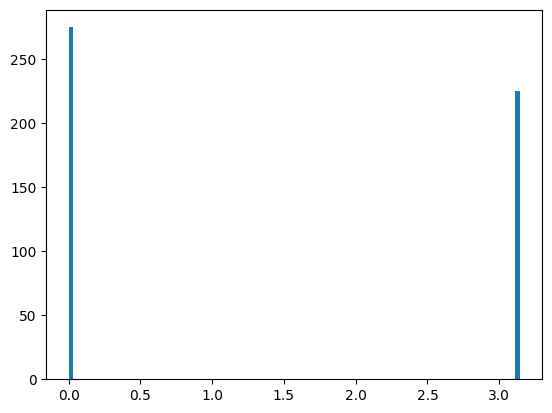

In [162]:
plt.hist(theta1,bins=100)

In [163]:
stats.norm(0,0.8).pdf(0) * (1/2 - eta2/2) - stats.norm(0,0.4).pdf(0) * (1/2 + eta2/2)


-0.6233473131272386

In [164]:
G10 = m2.pdf(0)
G11 = m2.pdf(np.pi)



Text(0, 0.5, 'Density')

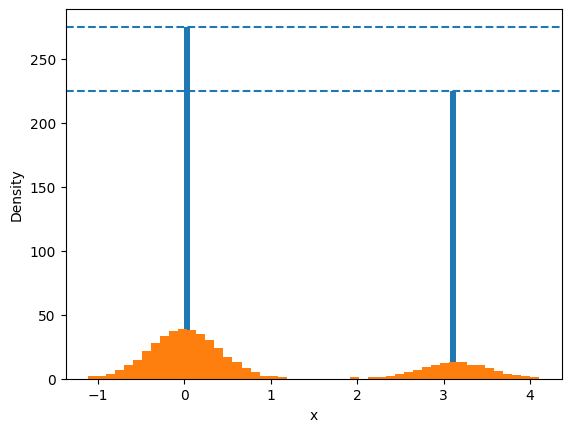

In [165]:
plt.hist(theta1,bins=50,density=False)
plt.hist(theta2,bins=50,density=False)
plt.axhline((1/2+eta1/2)*N,ls= '--')
plt.axhline((1/2-eta1/2)*N,ls= '--')

# plt.axhline(G10,ls= '--',color='tab:orange')
# plt.axhline(G11,ls= '--',color='tab:orange')


xs = np.linspace(-3,6,1000)
# plt.plot(xs,m1.pdf(xs))
# plt.plot(xs,m2.pdf(xs))
plt.xlabel('x')
plt.ylabel('Density')

In [166]:
Z1a = np.mean(np.exp(1j*theta1))
Z1b = np.mean(np.exp(1j*theta2))

Z2a = np.mean(np.exp(2j*theta1))
Z2b = np.mean(np.exp(2j*theta2))

Zs = [Z1a,Z2a,Z1b,Z2b]

names = ['R1','Q1','R2','Q2']

for Z,name in zip(Zs,names):
    Z_angle =  np.angle(Z)
    Z_abs =  np.abs(Z)
    print(name,rf'Z_angle = {Z_angle} Z_abs = {Z_abs}')

R1 Z_angle = 6.030557953659424e-12 Z_abs = 0.1
Q1 Z_angle = -1.0274027113706373e-13 Z_abs = 1.0
R2 Z_angle = 0.004044304936447446 Z_abs = 0.4623488612133861
Q2 Z_angle = -0.0009767291728866299 Z_abs = 0.7293252097243481


In [167]:
t = np.arange(0,10000,0.1)

In [168]:
from parfor import parfor

In [169]:
N1,N2 = N,N
K = 1
alphas = np.linspace(0,np.pi,10)
betas = np.linspace(0,1,11)[1:]


R1s = []
R2s = []
Q1s = []
Q2s = []

Q1s_std = []
Q2s_std = []

for beta in betas:

    @parfor(alphas,args=(beta,))
    def ParFOR(alpha,beta):
        (Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ2(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
        R1 = np.mean(np.abs(Z1as)[-500:])
        R2 = np.mean(np.abs(Z1bs)[-500:])
        Q1 = np.mean(np.abs(Z2as)[-500:])
        Q2 = np.mean(np.abs(Z2bs)[-500:])

        Q1_std = np.std(np.abs(Z2as)[-500:])
        Q2_std = np.std(np.abs(Z2bs)[-500:])
        
        return R1,R2,Q1,Q2,Q1_std,Q2_std
    R1,R2,Q1,Q2,Q1_std,Q2_std = zip(*ParFOR)
    R1s.append(R1)
    R2s.append(R2)
    Q1s.append(Q1)
    Q2s.append(Q2)

    Q1s_std.append(Q1_std)
    Q2s_std.append(Q2_std)
    

# for alpha in alphas:
#     _,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta,t,args=(N1,N2,beta,alpha,K))
#     R1 = np.abs(Z1as)
#     R2 = np.abs(Z1bs)
#     Q1 = np.abs(Z2as)
#     Q2 = np.abs(Z2bs)
#     R1s.append(R1)
#     R2s.append(R2)
#     Q1s.append(Q1)
#     Q2s.append(Q2)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [170]:
Q1s = np.array(Q1s)
Q2s = np.array(Q2s)

Q1s_std = np.array(Q1s_std)
Q2s_std = np.array(Q2s_std)

R1s = np.array(R1s)
R2s = np.array(R2s)

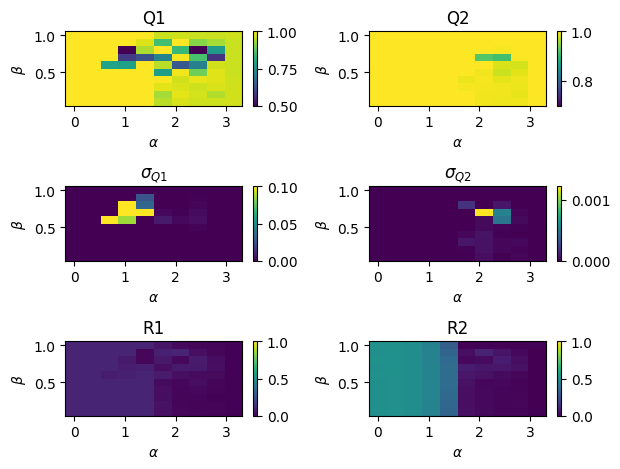

In [171]:
axs = []
fig,axs = plt.subplots(3,2)
((ax1,ax2),(ax1_1,ax2_1),(ax3,ax4)) =  axs
plt.sca(ax1)
plt.pcolormesh(alphas,betas,Q1s,vmin=0.5, vmax=1)
plt.colorbar(shrink=1)
plt.title('Q1')

plt.sca(ax2)
plt.pcolormesh(alphas,betas,Q2s,vmin=0.7, vmax=1.0)
plt.colorbar(shrink=1)
plt.title('Q2')


plt.sca(ax1_1)
plt.pcolormesh(alphas,betas,Q1s_std,vmin=0,vmax=0.1)
plt.colorbar(shrink=1)
plt.title(r'$\sigma_{Q1}$')

plt.sca(ax2_1)
plt.pcolormesh(alphas,betas,Q2s_std,vmin=0,)
plt.colorbar(shrink=1)
plt.title(r'$\sigma_{Q2}$')


plt.sca(ax3)
plt.pcolormesh(alphas,betas,R1s,vmin=0, vmax=1)
plt.colorbar(shrink=1)
plt.title('R1')

plt.sca(ax4)
plt.pcolormesh(alphas,betas,R2s,vmin=0, vmax=1)
plt.colorbar(shrink=1)
plt.title('R2')


for ax in axs.flatten():
    ax.set_ylabel(r'$\beta$')
    ax.set_xlabel(r'$\alpha$')


plt.tight_layout()


In [159]:
np.where(Q2s<0.92)

(array([6]), array([6]))

In [140]:
alpha,beta = alphas[6],betas[6]

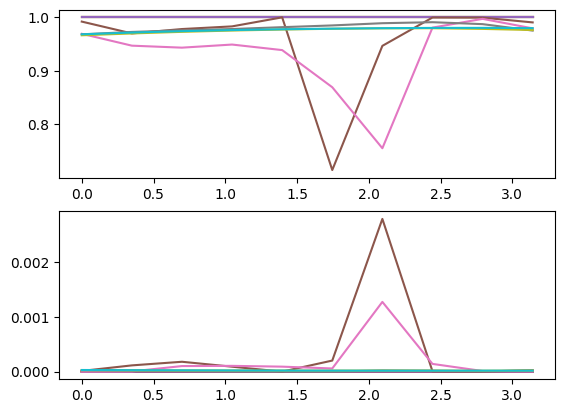

In [134]:
plt.subplot(211)
plt.plot(alphas,Q1s)

plt.subplot(212)
plt.plot(alphas,Q1s_std)


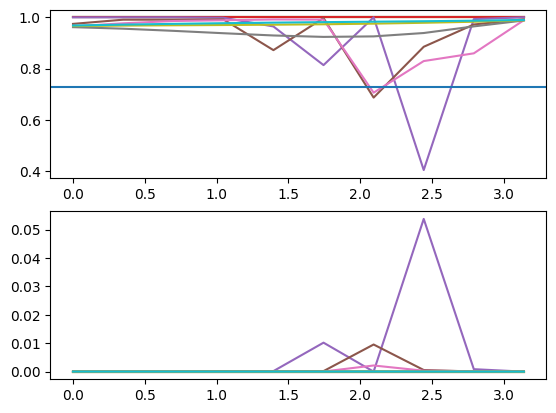

In [135]:
plt.subplot(211)
plt.plot(alphas,Q2s)
plt.axhline(abs(Z2b))

plt.subplot(212)
plt.plot(alphas,Q2s_std)



In [136]:

@parfor(betas,args=(1,))
def ParFOR(beta,alpha):
    (Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ2(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
    R1 = np.abs(Z1as)
    R2 = np.abs(Z1bs)
    Q1 = np.abs(Z2as)
    Q2 = np.abs(Z2bs)

    Q1_std = np.std(np.abs(Z2as)[-500:])
    Q2_std = np.std(np.abs(Z2bs)[-500:])
    
    return R1,R2,Q1,Q2,Q1_std,Q2_std
R1,R2,Q1,Q2,Q1_std,Q2_std = zip(*ParFOR)

  0%|          | 0/10 [00:00<?, ?it/s]

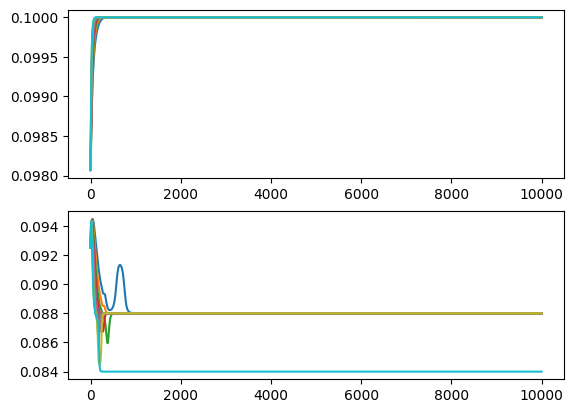

In [137]:
plt.subplot(211)
for R1_ in R1:
    plt.plot(t,R1_)
plt.subplot(212)
for R2_ in R2:
    plt.plot(t,R2_)

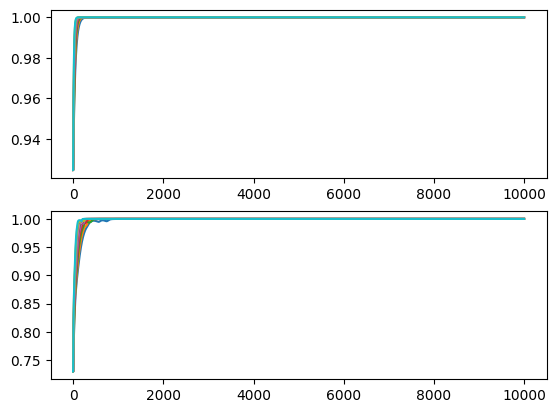

In [138]:
plt.subplot(211)
for Q1_ in Q1:
    plt.plot(t,Q1_)
plt.subplot(212)
for Q2_ in Q2:
    plt.plot(t,Q2_)

In [139]:
t = np.arange(0,80000,0.1)

In [140]:
alpha,beta = alphas[6],betas[6]

In [123]:

thetas,(Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))

In [127]:
R1 = np.abs(Z1as)
R2 = np.abs(Z1bs)
Q1 = np.abs(Z2as)
Q2 = np.abs(Z2bs)

Text(0, 0.5, 'Q')

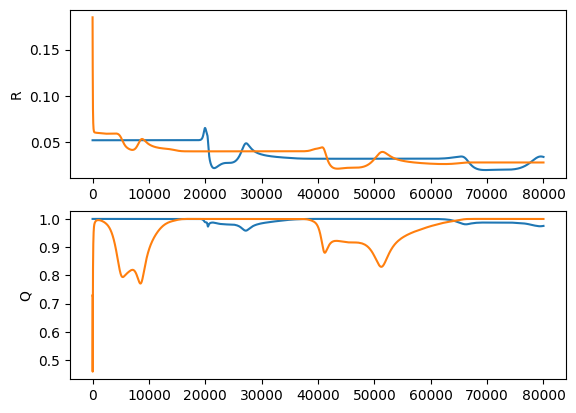

In [128]:
plt.subplot(211)
plt.plot(t,R1)
plt.plot(t,R2)
plt.ylabel('R')
# plt.axhline(abs(eta1))
# plt.axhline(abs(eta2))

plt.subplot(212)

plt.plot(t,Q1)
plt.plot(t,Q2)
plt.ylabel('Q')

In [129]:
sol = thetas

([<matplotlib.axis.XTick at 0x155556fd0>,
 [Text(0, 0, '0'),
  Text(250, 0, 'Group1'),
  Text(500, 0, '500'),
  Text(750, 0, 'Group2'),
  Text(1000, 0, '1000')])

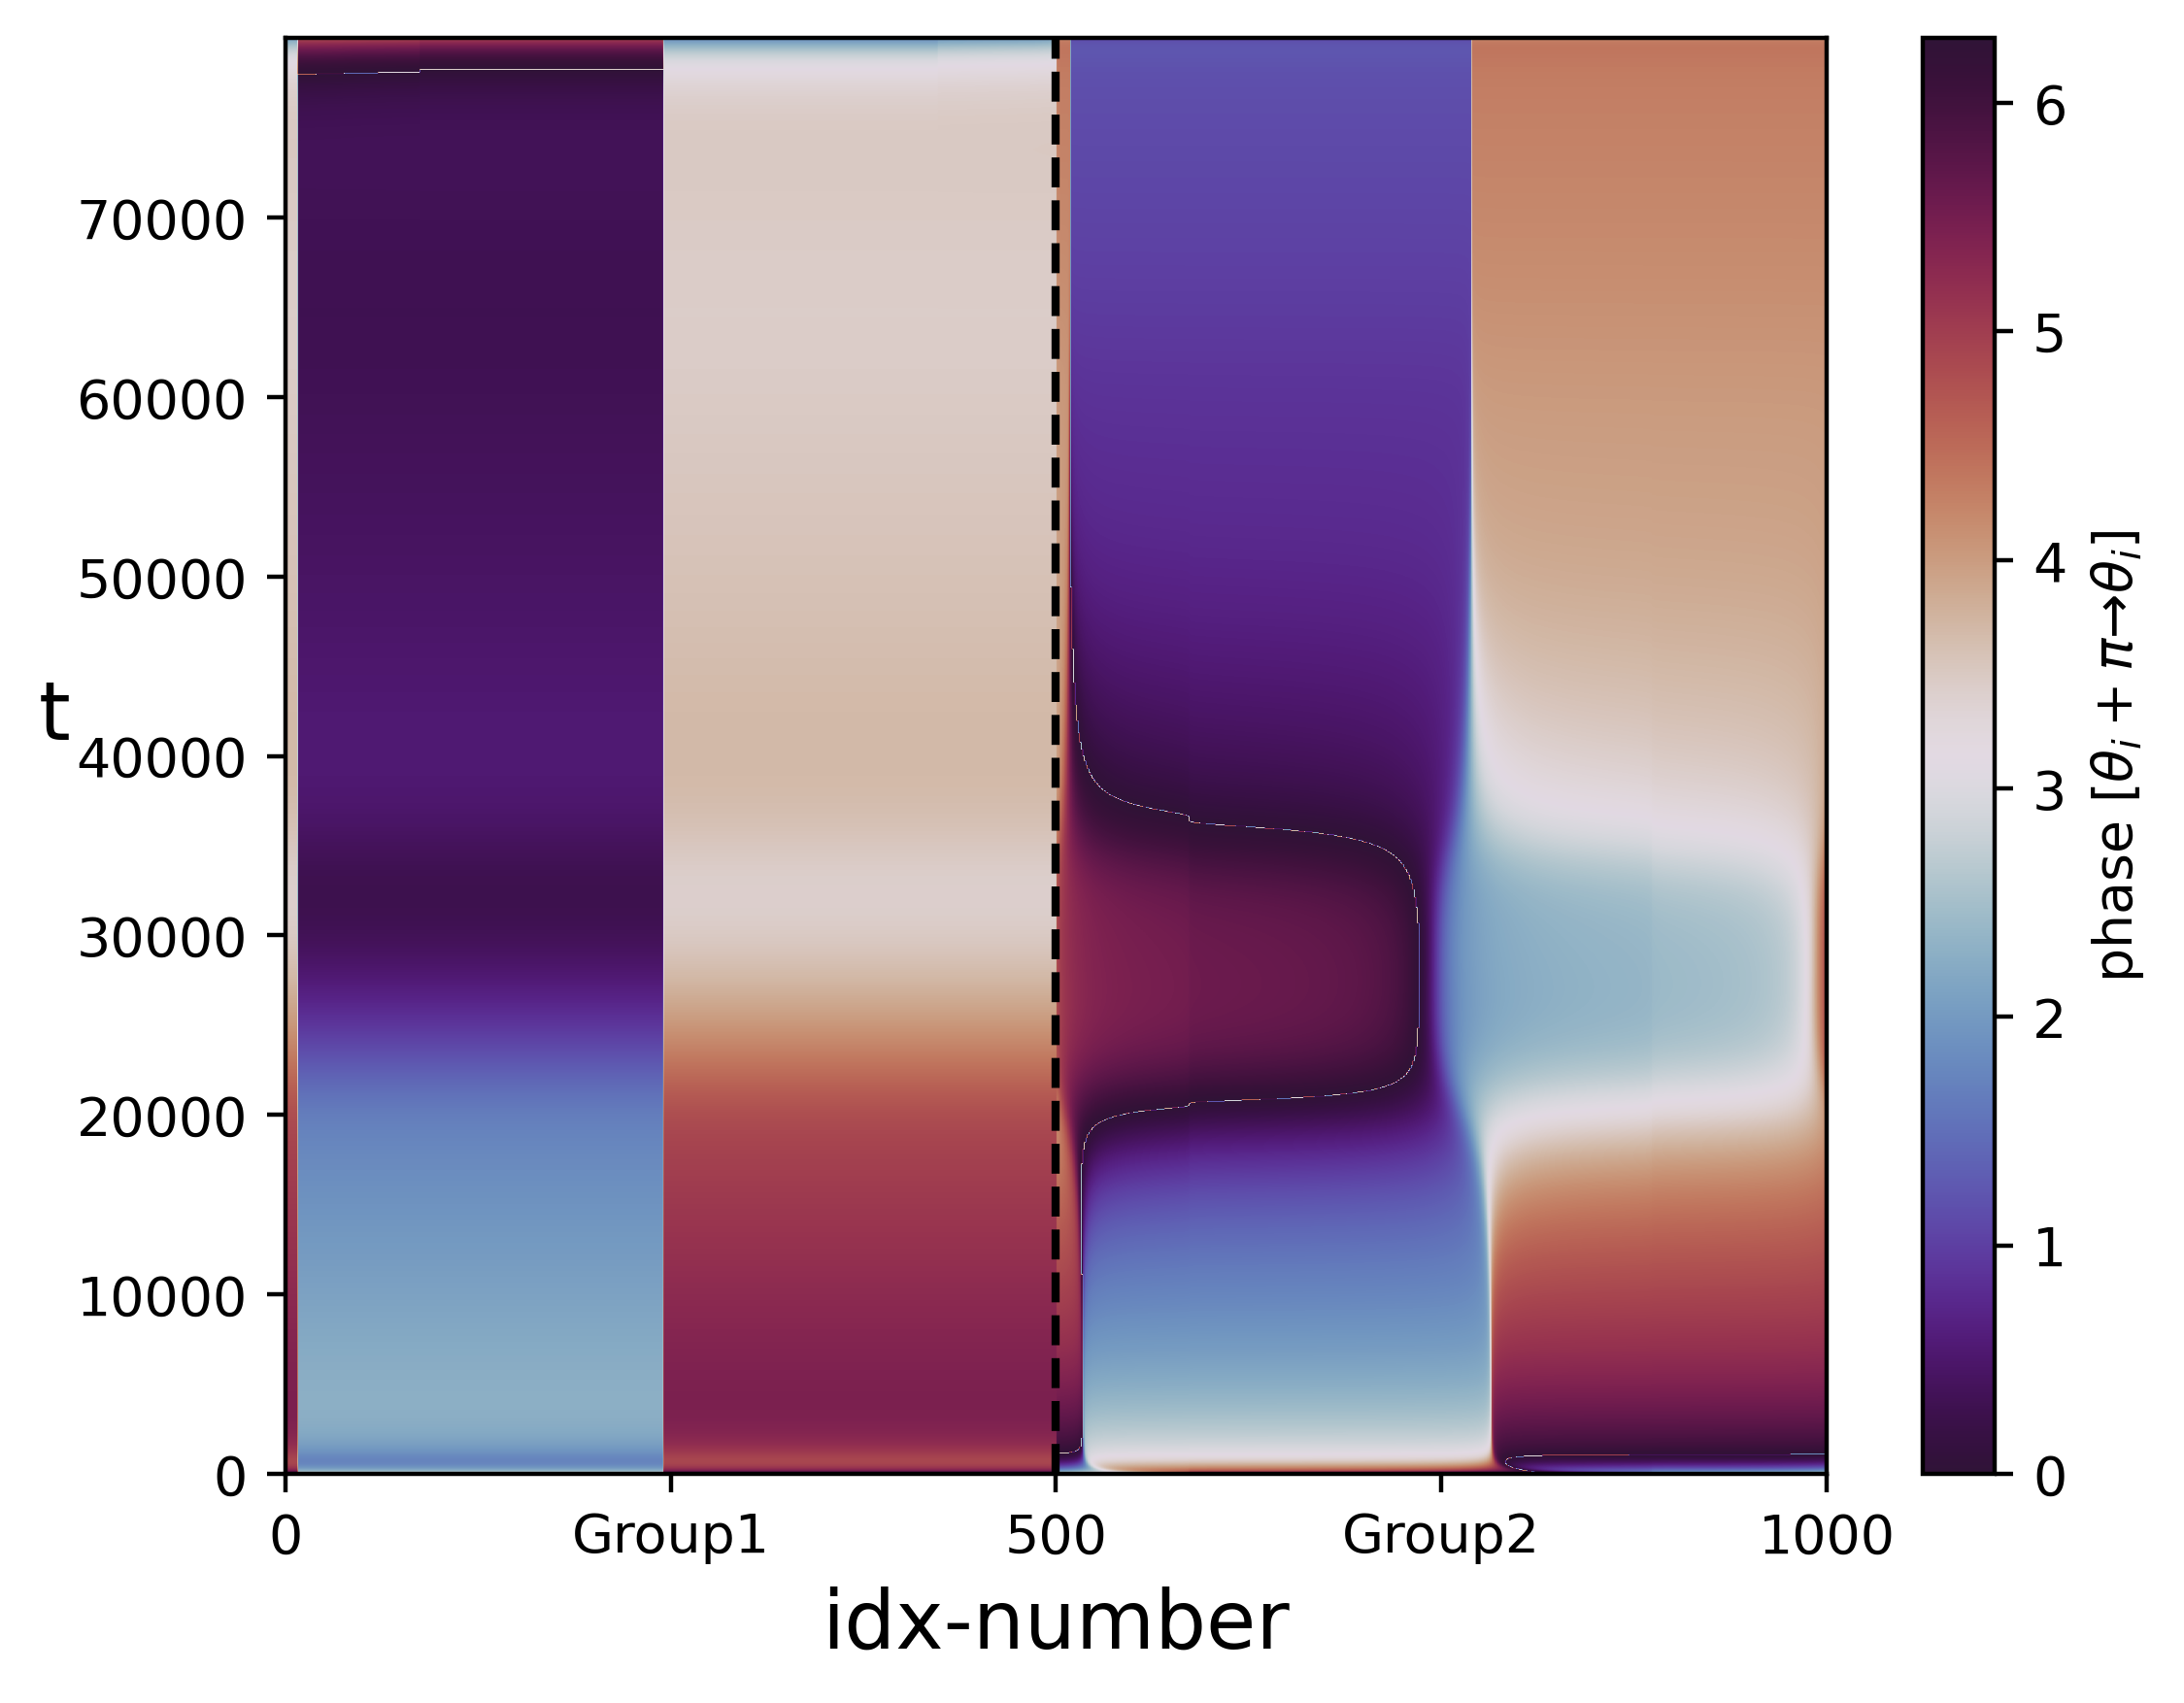

In [130]:
G1 =  np.argsort(sol[-1][:N]%(2*np.pi))
G2 =  np.argsort(sol[-1][N:]%(2*np.pi))
SG12 = np.array([*G1,*(N+G2)])
# plt.imshow((sol[-300:,:])%np.pi,origin='lower',cmap='twilight_shifted',aspect='auto')
plt.figure(dpi=400)
# plt.imshow(sol[-300:,SG12]%np.pi,origin='lower',cmap='twilight_shifted',aspect='auto',extent=[0,2*N,t[-300],t[-1]])
plt.imshow(sol[0:200_000:100,SG12]%(2*np.pi),origin='lower',cmap='twilight_shifted',aspect='auto',extent=[0,2*N,t[0],t[-1]])
cbar = plt.colorbar()
cbar.set_label(r'phase [$\theta_i+\pi\to\theta_i$]')

plt.axvline(N,color='black',ls='--')
plt.ylabel('t',rotation=0,fontsize=15)
plt.xlabel('idx-number',fontsize=15)
plt.xticks([0,N//2,N,N+(N//2),2*N],[0,'Group1',N,'Group2',2*N])


# plt.imshow(sol[:]%np.pi,origin='lower',cmap ='hsv')


(-1.0999986402114572, 1.0999986402114572, -1.1, 1.1)

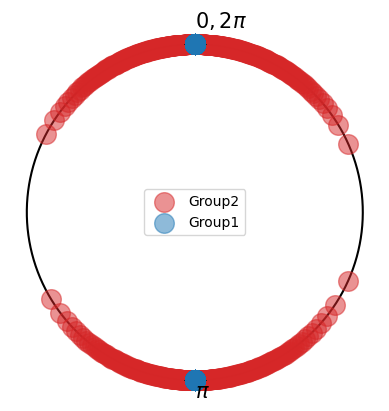

In [131]:
x = np.linspace(-np.pi,np.pi,1000)
fig = plt.figure()
ax =plt.gca()
ax.set_aspect(1)
ax.plot(np.sin(x),np.cos(x),color='k',zorder=-10)
idx= 0;
sca1 = ax.scatter(np.sin(sol[idx][N1:]),np.cos(sol[idx][N1:]),color='tab:red',label='Group2',s=200,alpha=0.5)
sca2 = ax.scatter(np.sin(sol[idx][:N1]),np.cos(sol[idx][:N1]),color='tab:blue',label='Group1',s=200,alpha=0.5,zorder=2)
ax.legend()
# idx= -1;plt.scatter(np.sin(sol[idx]),np.cos(sol[idx]))
# idx= 110;plt.scatter(np.sin(sol[-idx]),np.cos(sol[-idx]))
plt.text(0,1.1,r'$0,2\pi$',fontsize=15)
plt.text(0,-1.1,r'$\pi$',fontsize=15)
plt.axis('off')

In [133]:
def FOR_DATA(sol):
    DATA1 = list(zip(np.cos(sol[:,N1:]),np.sin(sol[:,N1:])))
    DATA2 = list(zip(np.cos(sol[:,:N1]),np.sin(sol[:,:N1])))
    DATA1 = [list(zip(*data)) for data in DATA1] 
    DATA2 = [list(zip(*data)) for data in DATA2]
    return DATA1,DATA2 

DATA1,DATA2 = FOR_DATA(sol)

def get_ani(idx):
    sca2.set_offsets(DATA2[idx])
    sca1.set_offsets(DATA1[idx])

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,500_00,100)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
HTML(ani.to_jshtml())
# ani.save(rf'HIGH ORDER CHIMERA/SB_B 2pi N={N1},alpha={alpha:.01f},beta={beta:.01f}.mp4',dpi=300)

: 